In [ ]:
# Execute if necessary
# %%capture
!pip install openml
!pip install nltk
# import nltk
# nltk.download()
# nltk.download('stopwords') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 2.2 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.13.1-py3-none-any.whl size=142798 sha256=32fcffcbf656b9c5571e7c15440b8cc5e8297f20b06ec75e9f4a71681a996e0b
  Stored in directory: /root/.cache/pip/wheels/f7/7a/fa/f73edc5ccecbab13bbf5fb888f2f943720f77114a1fa4ceffe
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=ded494628eb64a562ad366b817f9d585aa02e8f23e9748e3fa57a8ce13497549
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
#Progress bar
from tqdm import tqdm
# Preprocesamiento del texto (stopwords)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# expresion regular para normalización
import regex as re
# Preprosesamiento de texto a numero
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Práctica 5: Introducción a Modelos de Clasificación

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al comienzo de la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Implemente una clase que permita ajustar un modelo KNN. La clase debe cumplir con los siguientes requisitos:

- Debe contar con un método para realizar el entrenamiento en caso de ser requerido.
- Debe contar con un método para realizar las predicciones.
- Cada método debe imprimir una barra de progreso que permita conocer el tiempo estimado en que terminará.
- La clase debe permitir el uso de la distancia Mikownski y similitud coseno.

In [ ]:
#for i in tqdm (range (100), desc="Loading..."):
class KNN:
  data = []
  target = []
  k_nearest = 0
  method = ""

  #Inicializar clase KNN
  def __init__ (self, data, target, k_nearest, method):
    self.data = data
    self.target = target
    self.k_nearest = k_nearest
    self.method = method
  
  #Método privado
  def _form_cosine(self, a, b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    
  def _form_mikownski(self, a, b, P):
    mikownski_dist = 0
    for i in range(len(a)):
      mikownski_dist += (a[i] - b[i])**P
    
    mikownski_dist = mikownski_dist**(1/P)

    return mikownski_dist

  def calc_dist(self, punto, P):
    n = len(self.data)
    dist_to_point = []
    for i in range(n):
      if self.method == "cosine":
        dist_to_point.append((self._form_cosine(punto, self.data[i]), self.target[i]))
      if self.method == "mikownski":
        dist_to_point.append((self._form_mikownski(punto, self.data[i], P), self.target[i]))
    
    dist_to_point.sort(key = lambda x: x[0])   #index 0 means first element

    #get k nearest
    nearest = dist_to_point[:self.k_nearest]
    
    #get target of k_nearest to classify new point
    get_classes = list(set(i[-1] for i in nearest))
    count_class = np.zeros(len(get_classes))
    
    for i, cls in enumerate(get_classes):
      count = 0
      for j in range(self.k_nearest):
        if nearest[j][1] == cls:
          count += 1
      
      count_class[i] = count
    
    #get max index
    i = np.where(count_class == np.max(count_class))[0][0]
    # print(get_classes)
    # print(nearest)
    # print(count_class)
    new_target = get_classes[i]

    #print(f"El dato pertenece a la clase {new_target}")

    return new_target


  def predict(self, points, P = 2):
    new_targets = []

    for i in tqdm(range(len(points))):      
        new_targets.append(self.calc_dist(points[i], P))
    
    return new_targets

  

In [ ]:
knn_cosine = KNN([[5,2], [4,3], [3,4], [2, 4], [1, 3]], [1,2,1,2,2], k_nearest = 3, method = 'cosine')
knn_cosine.predict([[6, 1],[7,3],[3,6]])

100%|██████████| 3/3 [00:00<00:00, 1292.94it/s]


[2, 2, 1]

In [ ]:
knn_cosine = KNN([[5,2], [4,3], [3,4], [2, 4], [1, 3]], [1,2,1,2,2], k_nearest = 3, method = 'mikownski')
knn_cosine.predict([[6, 1],[7,3],[3,6]], P = 2)

100%|██████████| 3/3 [00:00<00:00, 5836.23it/s]


[1, 1, 2]

## Asignación 2

Implemente una clase que permita ajustar un modelo Naive Bayes. La clase debe cumplir con los siguientes requisitos:

- Debe contar con un método para realizar el entrenamiento en caso de ser requerido.
- Debe contar con un método para realizar las predicciones.
- Cada método debe imprimir una barra de progreso que permita conocer el tiempo estimado en que terminará.

In [ ]:
class NaiveBayesClassifier:
    # Inicializamos las variables internas
    def __init__(self):
        self.vocab = set()
        self.class_counts = {}
        self.word_counts = {}
        self.class_probabilities = {}

    def train(self, data):
        """
        Funcion para entrenar el modelo de Naive bayes para texto y su etiqueta realizando el conteo de cada una de las palabras en el documento
        Entrada:
        data : puede ser una lista que contiene lista, donde cada elemento de estas listas es el texto y otra la etiqueta correspondiente al texto

        Ejemplo:
        training_data = [
            ["Este es un buen producto", "positivo"],
            ["No me gustó el servicio", "negativo"],
            ["La calidad es excelente", "positivo"],
            ["No volveré a comprar aquí", "negativo"],
            ["El envío fue rápido", "positivo"]
        ]

        classifier = NaiveBayesClassifier()
        classifier.train(training_data)
        """
        # Count the number of documents in each class
        for document, label in data:
            if label not in self.class_counts:
                self.class_counts[label] = 0
            self.class_counts[label] += 1

        # Count the occurrences of each word in each class
        for document, label in data:
            for word in document.split():
                self.vocab.add(word)
                if label not in self.word_counts:
                    self.word_counts[label] = {}
                if word not in self.word_counts[label]:
                    self.word_counts[label][word] = 0
                self.word_counts[label][word] += 1

        # Compute the class probabilities
        num_documents = sum(self.class_counts.values())
        # tqdm (range (100), desc="Loading...")
        for label in tqdm(self.class_counts, desc='Loading...'):
            self.class_probabilities[label] = self.class_counts[label] / num_documents

    def _predictOne(self, document: str) -> str:
        
        """
        Realiza las predicciones acorde al método de entrenamiento previemente definido.

        Entradas:
        document: Texto del que queremos saber su probabilidad.

        Salida:
        La etiqueta a la cual pertenece el texto

        Ejemplo:
        document = "El producto es excelente"
        predicted_label = classifier.predict(document)
        print(predicted_label) # Imprime "positivo"
        """
        # Calculamos las probabilidades para cada clase
        log_probabilities = {}
        for label in self.class_counts:
            log_probabilities[label] = np.log(self.class_probabilities[label])
            for word in document.split():
                if word in self.word_counts[label]:
                    log_probabilities[label] += np.log(
                        (self.word_counts[label][word] + 1)
                        / (sum(self.word_counts[label].values()) + len(self.vocab))
                    )
                else:
                    log_probabilities[label] += np.log(
                        1 / (sum(self.word_counts[label].values()) + len(self.vocab))
                    )

        # Regresa la etiqueta con la que tiene mayor probabilidad
        return max(log_probabilities, key=log_probabilities.get)
    
    def predict(self, data):
      predictions = []
      for doc in data:
        predictions.append(self._predictOne(doc))
      
      return predictions

En esta sección se incluye un dataset real. El dataset importado se llama _spambase_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/42904

In [ ]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(42904, download_data=False)

target = "CLASS"

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    _, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

columns = np.array(columns)

In [ ]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")

La columna a predecir se llama 'CLASS'
Todas las características son ['COMMENT_ID' 'AUTHOR' 'DATE' 'CONTENT']


In [ ]:
# Impresión de las características
features
features.drop(axis = 0, index = 134, inplace = True)

In [ ]:
outputs
outputs.drop(axis = 0, index = 134, inplace = True)

# Asignación 3

Realice el preprocesamiento que considere adecuado para que el dataset pueda ser procesado por un modelo de clasificación. __No olvide utilizar particionar en entrenamiento y validación, y realizar el preprocesamiento de manera adecuada__.

In [ ]:
features

,COMMENT_ID,AUTHOR,DATE,CONTENT
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ..."
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿
...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...


In [ ]:
def normalizar(text: str()) -> str:
    """
    Funcion para normalizar el texto y eliminar stopwords, así como signos de puntuación, guiones bajos y demás caracteres que no sean texto, retorna la cadena limpia.
    Entrada:
    text : texto para normalizar
    """
    stop_words = set(stopwords.words("english"))
    lower_string = text.lower()

    no_number_string = re.sub(r"\d+", "", lower_string)
    no_sub_ = re.sub("[\_]", " ", no_number_string)
    no_punc_string = re.sub(r"[^\w\s]", "", no_sub_)
    no_wspace_string = no_punc_string.strip()
    # no_wspace_string

    lst_string = [no_wspace_string][0].split()
    # print(lst_string)
    no_stpwords_string = ""
    for i in lst_string:
        if not i in stop_words:
            no_stpwords_string += i + " "

    no_stpwords_string = no_stpwords_string[:-1]

    return no_stpwords_string

In [ ]:
txt = features.CONTENT

print('sin normalizar:', txt[0], '\n normalizado:', normalizar(txt[0]))

sin normalizar: Huh, anyway check out this you[tube] channel: kobyoshi02 
 normalizado: huh anyway check youtube channel kobyoshi


In [ ]:
# Obtenemos la columna del texto con el que vamos a trabajar
txt = features.CONTENT

# Creamos una lista donde cada renglon es un comentario y lo normalizamos
txt_clean = [normalizar(line) for line in txt]

# Objeto listo para la implementación de Naive Bayes
# txt_for_nb = list(zip(txt_clean, outputs))
# print(txt_clean)

### Preprocesamiento para KNN

In [ ]:
# Preprocesamiento para knn
# Creamos un objeto CountVectorizer
count_vect = CountVectorizer()

# Creamos un vector donde se almacenan las cuentas de cada palabra
x_counts = count_vect.fit_transform(np.array(txt_clean)) #list of texts, each text is a string
print(x_counts.toarray())
# # Creamos un objeto que transforma el conteo a probabilidades
# tdfif_transformer = TfidfTransformer()
# x_tfidf = tdfif_transformer.fit_transform(x_counts)

# # Creamos un np.array de las salidas
# y = np.asarray(outputs)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# import collections

# #Encontrar filas que sean solo de valroes 0, es decir 
# #que no tienen palabras.
# data = x_counts.toarray()
# nulo = np.zeros(len(data[0]))
# for i, row in enumerate(data):
#   if(collections.Counter(row)==collections.Counter(nulo)):
#     print(f'Vacio_indice = {i}')
#     #Eliminar campo y target
#     data = np.delete(data, i)
#     y = np.delete(y, i)

#Encontramos que el indice 134 estaba vacio, fin.

# Asignación 4

Realice una visualización de los datos en dos dimensiones. Posteriormente entrene un modelo de KNN (utilizando la clase implementada anteriormente) y valide que su modelo generaliza bien.

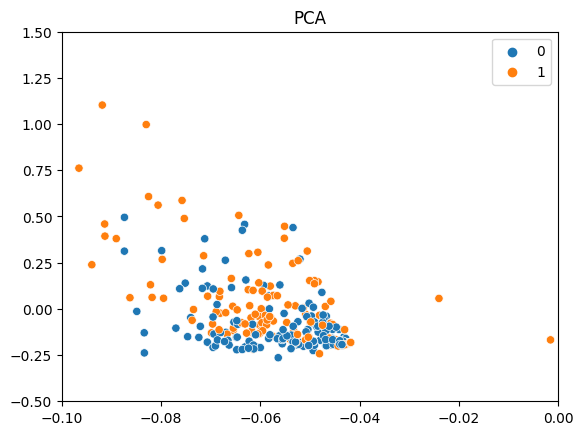

In [ ]:
X_reduced = PCA(n_components=2).fit_transform(x_counts.toarray())
fig, ax = plt.subplots()
sns.scatterplot(
    x = X_reduced[:, 0],
    y = X_reduced[:, 1],    
    hue = outputs
)
plt.title("PCA")
plt.legend()
plt.xlim(-.1,0)
plt.ylim(-0.5,1.5)
fig.show()

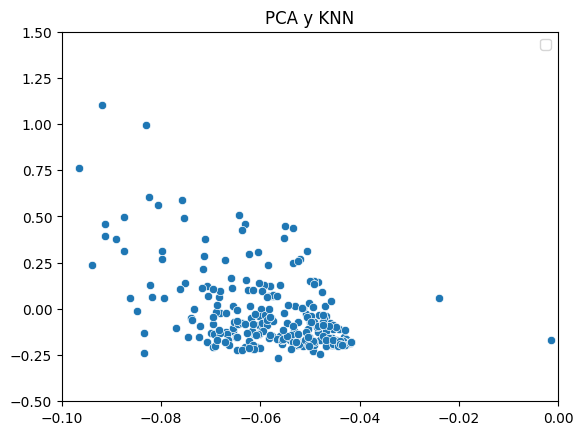

In [ ]:
X_reduced = PCA(n_components=2).fit_transform(x_counts.toarray())
fig, ax = plt.subplots()
sns.scatterplot(
    x = X_reduced[:, 0],
    y = X_reduced[:, 1],    
    #hue = outputs
)
plt.title("PCA y KNN")
plt.legend()
plt.xlim(-.1,0)
plt.ylim(-0.5,1.5)
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_counts.toarray(), list(outputs), test_size=0.2, random_state=401)

In [ ]:
knn_cosine = KNN(X_train, y_train, k_nearest = 5, method = 'cosine')
predicted = knn_cosine.predict(X_test)

100%|██████████| 70/70 [00:00<00:00, 152.81it/s]


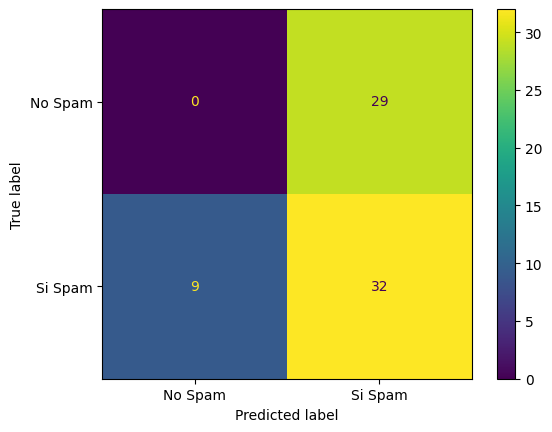

Accuracy: 0.45714285714285713,
Precision :0.5245901639344263, 
Sensitivity_recall:0.7804878048780488,
Specificity:0.0,
F1_score:0.627450980392157


In [ ]:
#Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, predicted)#, normalize = 'all'
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Spam', 'Si Spam'])
cm_display.plot()
plt.show()

#Métricas de error
Sensitivity_recall = metrics.recall_score(y_test, predicted)
Specificity = metrics.recall_score(y_test, predicted, pos_label=0)
Accuracy = metrics.accuracy_score(y_test, predicted)
Precision = metrics.precision_score(y_test, predicted)
F1_score = metrics.f1_score(y_test, predicted)
print(f"Accuracy: {Accuracy},\nPrecision :{Precision}, \nSensitivity_recall:{Sensitivity_recall},\nSpecificity:{Specificity},\nF1_score:{F1_score}")

In [ ]:
#Cross validation
from sklearn.model_selection import KFold

#10 pliegues
kf = KFold(n_splits = 10)

kf_accuracy = []
kf_precision = []
kf_recall = []
kf_specificity = []
kf_f1 = []

#Obtener los indices por cada K_fold
y_train = list(y_train) #Convertir de pd.Series a List
for train, val in kf.split(X_train):
  kf_x_train = []
  kf_y_train = []

  kf_x_val = []
  kf_y_val = []

  
  #Train data
  for index in train:
    kf_x_train.append(X_train[int(index)]) #list
    kf_y_train.append(y_train[int(index)]) #pandas series
    
  #Validation data
  for index in val:
    kf_x_val.append(X_train[int(index)])
    kf_y_val.append(y_train[int(index)])

  knn_cosine = KNN(kf_x_train, kf_y_train, k_nearest = 15, method = 'cosine')
  predicted = knn_cosine.predict(kf_x_val)
  
  #metrics
  Sensitivity_recall = metrics.recall_score(kf_y_val, predicted)
  Specificity = metrics.recall_score(kf_y_val, predicted, pos_label=0)
  Accuracy = metrics.accuracy_score(kf_y_val, predicted)
  Precision = metrics.precision_score(kf_y_val, predicted)
  F1_score = metrics.f1_score(kf_y_val, predicted)
  
  kf_accuracy.append(Accuracy)
  kf_precision.append(Precision)
  kf_recall.append(Sensitivity_recall)
  kf_specificity.append(Specificity)
  kf_f1.append(F1_score)

print(f"\nCross_val_accuracy = {np.mean(kf_accuracy)}")
print(f"Cross_val_precision = {np.mean(kf_precision)}")
print(f"Cross_val_recall = {np.mean(kf_recall)}")
print(f"Cross_val_specificity = {np.mean(kf_specificity)}")
print(f"Cross_val_f1 = {np.mean(kf_f1)}")

100%|██████████| 27/27 [00:00<00:00, 174.14it/s]


Cross_val_accuracy = 0.42288359788359786
Cross_val_precision = 0.4511353364831626
Cross_val_recall = 0.8841329284750337
Cross_val_specificity = 0.0
Cross_val_f1 = 0.5868571565362323


# Asignación 5

Entrene un modelo de Naive Bayes (utilizando la clase implementada anteriormente) y valide que su modelo generaliza bien.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(txt_clean, list(outputs), test_size=0.2, random_state=401)

Loading...: 100%|██████████| 2/2 [00:00<00:00, 636.13it/s]


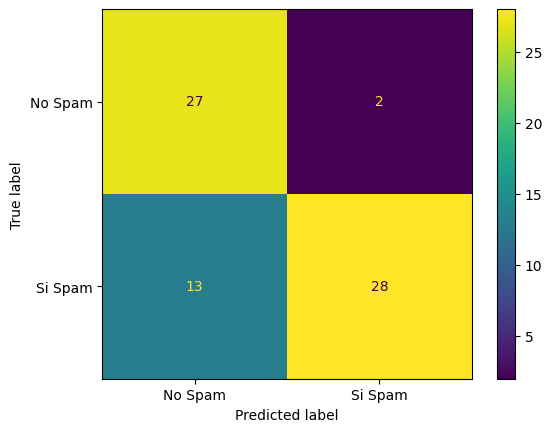

Accuracy: 0.7857142857142857,
Precision :0.9333333333333333, 
Sensitivity_recall:0.6829268292682927,
Specificity:0.9310344827586207,
F1_score:0.7887323943661972


In [ ]:
model_NB = NaiveBayesClassifier()
model_NB.train(list(zip(X_train, y_train)))
predicted = model_NB.predict(X_test)

#Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, predicted)#, normalize = 'all'
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Spam', 'Si Spam'])
cm_display.plot()
plt.show()

#Métricas de error
Sensitivity_recall = metrics.recall_score(y_test, predicted)
Specificity = metrics.recall_score(y_test, predicted, pos_label=0)
Accuracy = metrics.accuracy_score(y_test, predicted)
Precision = metrics.precision_score(y_test, predicted)
F1_score = metrics.f1_score(y_test, predicted)
print(f"Accuracy: {Accuracy},\nPrecision :{Precision}, \nSensitivity_recall:{Sensitivity_recall},\nSpecificity:{Specificity},\nF1_score:{F1_score}")

In [ ]:
#10 pliegues
kf = KFold(n_splits = 10)

kf_accuracy = []
kf_precision = []
kf_recall = []
kf_specificity = []
kf_f1 = []

#Obtener los indices por cada K_fold
y_train = list(y_train) #Convertir de pd.Series a List
for train, val in kf.split(X_train):
  kf_x_train = []
  kf_y_train = []

  kf_x_val = []
  kf_y_val = []

  
  #Train data
  for index in train:
    kf_x_train.append(X_train[int(index)]) #list
    kf_y_train.append(y_train[int(index)]) #pandas series
    
  #Validation data
  for index in val:
    kf_x_val.append(X_train[int(index)])
    kf_y_val.append(y_train[int(index)])

  model_NB = NaiveBayesClassifier()
  model_NB.train(list(zip(kf_x_train, kf_y_train)))

  predicted = model_NB.predict(kf_x_val)
  
  #metrics
  Sensitivity_recall = metrics.recall_score(kf_y_val, predicted)
  Specificity = metrics.recall_score(kf_y_val, predicted, pos_label=0)
  Accuracy = metrics.accuracy_score(kf_y_val, predicted)
  Precision = metrics.precision_score(kf_y_val, predicted)
  F1_score = metrics.f1_score(kf_y_val, predicted)
  
  kf_accuracy.append(Accuracy)
  kf_precision.append(Precision)
  kf_recall.append(Sensitivity_recall)
  kf_specificity.append(Specificity)
  kf_f1.append(F1_score)

print(f"Cross_val_accuracy = {np.mean(kf_accuracy)}")
print(f"Cross_val_precision = {np.mean(kf_precision)}")
print(f"Cross_val_recall = {np.mean(kf_recall)}")
print(f"Cross_val_specificity = {np.mean(kf_specificity)}")
print(f"Cross_val_f1 = {np.mean(kf_f1)}")

Loading...: 100%|██████████| 2/2 [00:00<00:00, 5489.93it/s]


Cross_val_accuracy = 0.8605820105820106
Cross_val_precision = 0.9348076923076925
Cross_val_recall = 0.7688021481442535
Cross_val_specificity = 0.9492991528595244
Cross_val_f1 = 0.8320096054548701
